# Experiment testing (in-)dependence of scores with total read counts in data

## Part 1
In the following experiment we score several preprocessed datasets (CRC, ESCC, and LUAD) for genes separating malignant versus non-malignant cells. We want to see if the scores correlate with the total read counts given by the datasets. 

Expectation: As malignant cells generally have higher total read counts and we are scoring for signatures separating malignant from non-malignant counts, we except correlation between the scores and the total read counts. 

In [1]:
import os
import sys

sys.path.append('../..')

import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from scipy.stats import kstest

from src.utils.utils import get_gene_list_real_data,get_mean_and_variance_gene_expression
from src.scoring_methods.gene_signature_scoring import score_signature
from src.data.preprocess_data import preprocess

In [2]:
## Paths to datasets (define path to data)
base_path = '...'
crc_path = os.path.join(base_path, 'crc/preprocessed_data.h5ad')
escc_path = os.path.join(base_path, 'esophag/preoprocessed_data.h5ad')
luad_path = os.path.join(base_path, 'luad/preprocessed_data.h5ad')

In [3]:
## global variable for experiment
nr_of_sig_genes = 50

In [4]:
## Path to store data or images (define storing path)
storing_path = '.../correlation_scores_with_TRC_and_MTP_experiments/'

### CRC

In [5]:
adata = sc.read_h5ad(crc_path)

gene_list = get_gene_list_real_data(adata,
                                    dge_log2fc_min=1,
                                    nr_de_genes=nr_of_sig_genes,
                                    mode="most_diff_expressed",
                                    label_col='malignant_key',
                                    label_of_interest='malignant')

In [6]:
%%time
score_signature(
    method="adjusted_neighborhood_scoring",
    adata=adata,
    gene_list=gene_list
)

No store_path indicated, thus no data stored.
CPU times: user 4.29 s, sys: 984 ms, total: 5.28 s
Wall time: 5.27 s


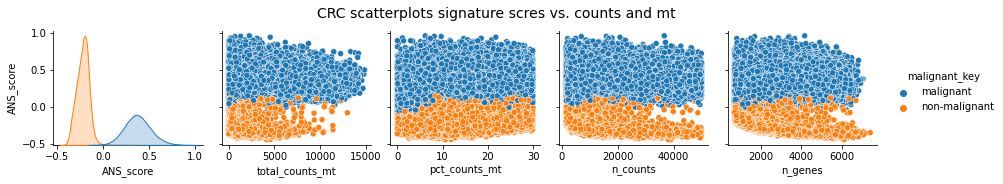

In [7]:
g = sns.pairplot(data=adata.obs[['malignant_key','ANS_score','total_counts_mt','pct_counts_mt', 'n_counts', 'n_genes']],
            hue = 'malignant_key',
            y_vars=['ANS_score'])
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('CRC scatterplots signature scres vs. counts and mt', fontsize = 14)
g.fig.savefig(os.path.join(storing_path, 'scatterplot_scores_vs_other_cols_CRC.png'), format='png', dpi=300)

In [8]:
adata.obs[['ANS_score','total_counts_mt','pct_counts_mt', 'n_counts', 'n_genes']].corr()

,ANS_score,total_counts_mt,pct_counts_mt,n_counts,n_genes
ANS_score,1.000000,0.508230,0.334309,0.505258,0.451818
total_counts_mt,0.508230,1.000000,0.580303,0.842495,0.802270
pct_counts_mt,0.334309,0.580303,1.000000,0.259660,0.277977
n_counts,0.505258,0.842495,0.259660,1.000000,0.951408
n_genes,0.451818,0.802270,0.277977,0.951408,1.000000


In [9]:
del adata

### ESCC

In [10]:
adata = sc.read_h5ad(escc_path)

gene_list = get_gene_list_real_data(adata,
                                    dge_log2fc_min=1,
                                    nr_de_genes=nr_of_sig_genes,
                                    mode="most_diff_expressed",
                                    label_col='malignant_key',
                                    label_of_interest='malignant')

In [11]:
%%time
score_signature(
    method="adjusted_neighborhood_scoring",
    adata=adata,
    gene_list=gene_list,
)

No store_path indicated, thus no data stored.
CPU times: user 5.02 s, sys: 1.08 s, total: 6.1 s
Wall time: 6.09 s


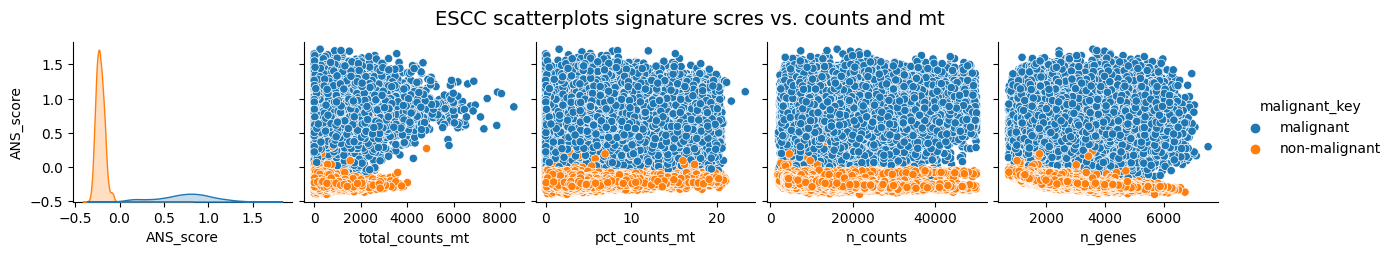

In [12]:
g = sns.pairplot(data=adata.obs[['malignant_key','ANS_score','total_counts_mt','pct_counts_mt', 'n_counts', 'n_genes']],
            hue = 'malignant_key',
            y_vars=['ANS_score'])
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('ESCC scatterplots signature scres vs. counts and mt', fontsize = 14)
g.fig.savefig(os.path.join(storing_path, 'scatterplot_scores_vs_other_cols_ESCC.png'), format='png', dpi=300)

In [13]:
adata.obs[['ANS_score','total_counts_mt','pct_counts_mt', 'n_counts', 'n_genes']].corr()

,ANS_score,total_counts_mt,pct_counts_mt,n_counts,n_genes
ANS_score,1.000000,0.467400,0.275481,0.380192,0.342708
total_counts_mt,0.467400,1.000000,0.617601,0.679062,0.665234
pct_counts_mt,0.275481,0.617601,1.000000,0.041521,0.085008
n_counts,0.380192,0.679062,0.041521,1.000000,0.867895
n_genes,0.342708,0.665234,0.085008,0.867895,1.000000


In [14]:
del adata

### LUAD

In [15]:
adata = sc.read_h5ad(luad_path)

gene_list = get_gene_list_real_data(adata,
                                    dge_log2fc_min=1,
                                    nr_de_genes=nr_of_sig_genes,
                                    mode="most_diff_expressed",
                                    label_col='malignant_key',
                                    label_of_interest='malignant')

In [16]:
%%time
score_signature(
    method="adjusted_neighborhood_scoring",
    adata=adata,
    gene_list=gene_list,
)

No store_path indicated, thus no data stored.
CPU times: user 1.35 s, sys: 377 ms, total: 1.72 s
Wall time: 1.72 s


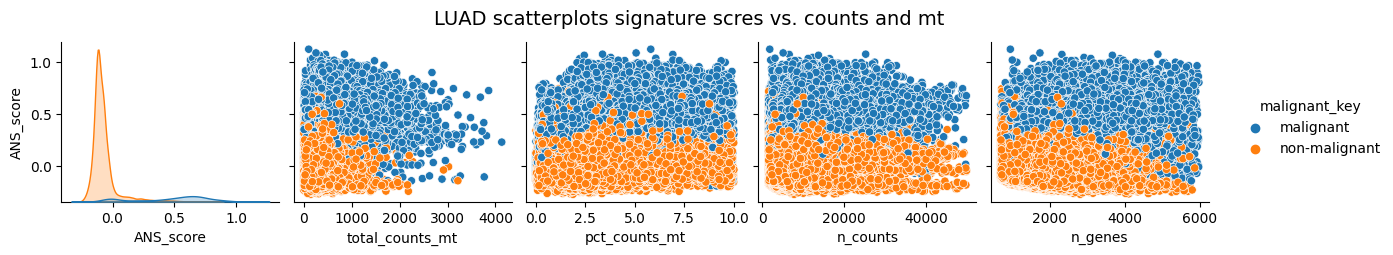

In [17]:
g = sns.pairplot(data=adata.obs[['malignant_key','ANS_score','total_counts_mt','pct_counts_mt', 'n_counts', 'n_genes']],
            hue = 'malignant_key',
            y_vars=['ANS_score'])
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('LUAD scatterplots signature scres vs. counts and mt', fontsize = 14)
g.fig.savefig(os.path.join(storing_path, 'scatterplot_scores_vs_other_cols_LUAD.png'), format='png', dpi=300)

In [18]:
adata.obs[['ANS_score','total_counts_mt','pct_counts_mt', 'n_counts', 'n_genes']].corr()

,ANS_score,total_counts_mt,pct_counts_mt,n_counts,n_genes
ANS_score,1.000000,0.531807,0.298793,0.474525,0.553490
total_counts_mt,0.531807,1.000000,0.498513,0.785992,0.817679
pct_counts_mt,0.298793,0.498513,1.000000,0.089407,0.200789
n_counts,0.474525,0.785992,0.089407,1.000000,0.888612
n_genes,0.553490,0.817679,0.200789,0.888612,1.000000


In [19]:
del adata

## Part 2
In the second part of the experiment we look again at B-cells from the PBMS dataset and score for B-cell subtypes.

Expectation: No correlation between the cells and the scores. 

In [20]:
## Paths to dataset (define path to data)
base_path = '...'
## Path to store data or images (define storing path)
storing_path = '.../correlation_scores_with_TRC_and_MTP_experiments/'

In [ ]:
adata = sc.read_h5ad(os.path.join(base_path, 'multi.h5ad'))

In [ ]:
adata = adata.raw.to_adata()
adata.var_names = adata.var['_index']
adata.var_names.name = None

In [23]:
adata = adata[adata.obs['celltype.l2'].str.contains('B ')].copy()

In [24]:
adata.obs['celltype.l2'].value_counts()

B naive           7718
B memory          3285
B intermediate    2431
Name: celltype.l2, dtype: int64

In [25]:
adatas = {}
for group in adata.obs.groupby('orig.ident'):
    adatas[group[0]] = adata[group[1].index,].copy()

In [26]:
del adata

In [27]:
for key, adata in adatas.items():
    preprocess(adata,
               min_genes=200,
               min_cells=3,
               target_sum=1e4)

In [28]:
adata = sc.concat(list(adatas.values()), join='inner', merge='same')
adata

AnnData object with n_obs × n_vars = 13434 × 8902
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'n_genes'
    var: '_index'
    obsm: 'X_apca', 'X_aumap', 'X_pca', 'X_spca', 'X_umap', 'X_wnn.umap'

In [29]:
del adatas

In [30]:
DE_of_celltypes = pd.read_csv(os.path.join(base_path,'DE_by_celltype.csv'))

In [31]:
subtypes_B = np.unique(DE_of_celltypes[DE_of_celltypes['Cell Type'].str.contains('B ')]['Cell Type'])
subtypes_B

array(['B intermediate kappa', 'B intermediate lambda', 'B memory kappa',
       'B memory lambda', 'B naive kappa', 'B naive lambda'], dtype=object)

In [32]:
SG_subtypes_B = {}
for subtype in subtypes_B:
    SG_subtypes_B[subtype] = list(DE_of_celltypes[DE_of_celltypes['Cell Type']==subtype]['Gene'])

In [33]:
SG_subtypes_B['B intermediate'] = set(SG_subtypes_B['B intermediate kappa']).union(set(SG_subtypes_B['B intermediate lambda']))
SG_subtypes_B['B memory'] = set(SG_subtypes_B['B memory kappa']).union(set(SG_subtypes_B['B memory lambda']))
SG_subtypes_B['B naive'] = set(SG_subtypes_B['B naive kappa']).union(set(SG_subtypes_B['B naive lambda']))

In [34]:
for subtype in subtypes_B:
    SG_subtypes_B.pop(subtype, None)

In [35]:
for key, val in SG_subtypes_B.items():
    print(f'signature for B-cell subtype {key} has length {len(val)}')

signature for B-cell subtype B intermediate has length 129
signature for B-cell subtype B memory has length 126
signature for B-cell subtype B naive has length 125


In [36]:
intersection_intermediate_naive = SG_subtypes_B['B intermediate'].intersection(SG_subtypes_B['B naive'])
print('nr. sig. genes intersecting naive and intermediate ',len(intersection_intermediate_naive))
intersection_memory_naive = SG_subtypes_B['B memory'].intersection(SG_subtypes_B['B naive'])
print('nr. sig. genes intersecting naive and memory ',len(intersection_memory_naive))
intersection_intermediate_memory = SG_subtypes_B['B intermediate'].intersection(SG_subtypes_B['B memory'])
print('nr. sig. genes intersecting memory and intermediate ',len(intersection_intermediate_memory))

SG_subtypes_B['B intermediate'].difference_update(intersection_intermediate_memory.union(intersection_intermediate_naive))
SG_subtypes_B['B memory'].difference_update(intersection_memory_naive.union(intersection_intermediate_memory))
SG_subtypes_B['B naive'].difference_update(intersection_intermediate_naive.union(intersection_memory_naive))

nr. sig. genes intersecting naive and intermediate  75
nr. sig. genes intersecting naive and memory  69
nr. sig. genes intersecting memory and intermediate  91


In [37]:
for key, val in SG_subtypes_B.items():
    print(f'signature for B-cell subtype {key} has length {len(val)}')

signature for B-cell subtype B intermediate has length 23
signature for B-cell subtype B memory has length 26
signature for B-cell subtype B naive has length 41


In [38]:
score_cols = []
for key, val in SG_subtypes_B.items():
    cp_key = key
    score_name = cp_key.replace(" ", "_")+'_scores'
    score_signature(
        method="adjusted_neighborhood_scoring",
        adata=adata,
        gene_list=val,
        score_name = score_name
    )
    score_cols.append(score_name)

No store_path indicated, thus no data stored.
No store_path indicated, thus no data stored.
No store_path indicated, thus no data stored.


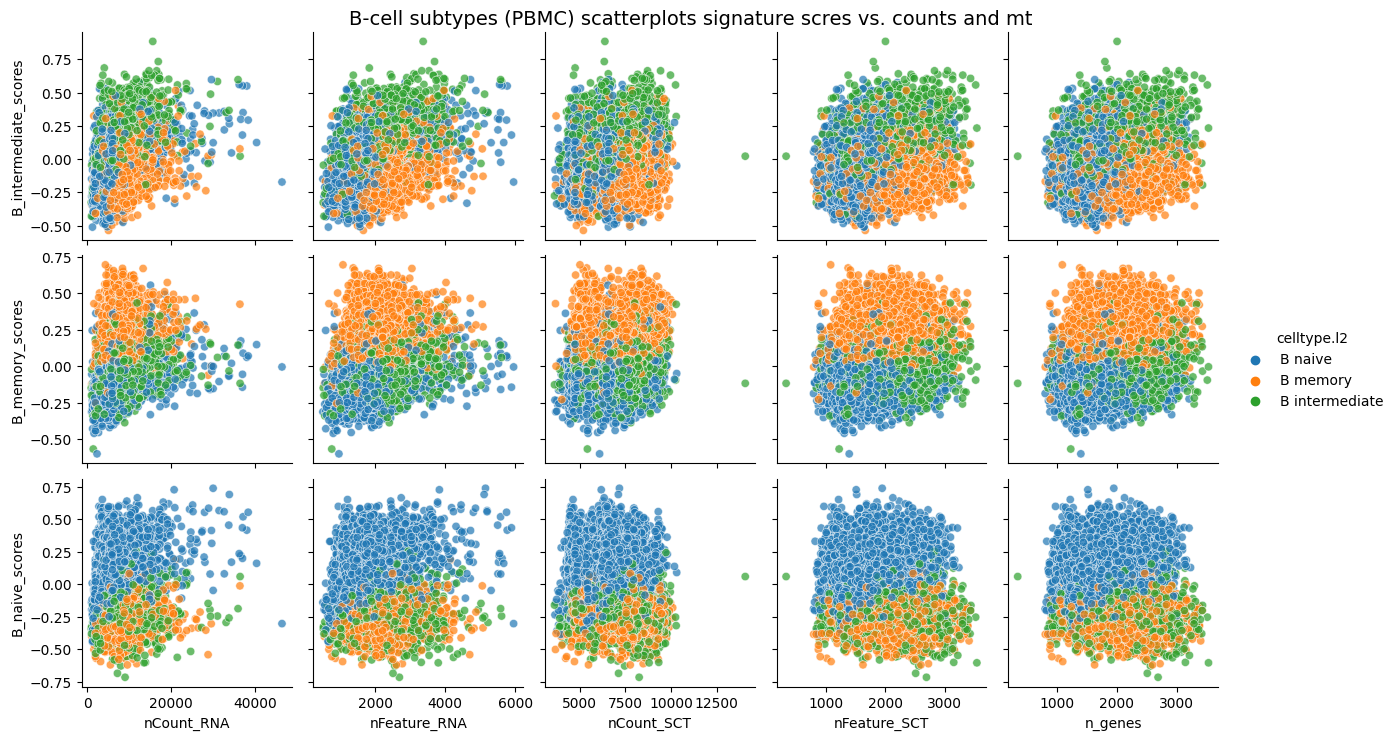

In [40]:
g = sns.pairplot(data=adata.obs[score_cols+['celltype.l2','nCount_RNA', 'nFeature_RNA','nCount_SCT', 'nFeature_SCT', 'n_genes']],
                 hue = 'celltype.l2',
                 x_vars=['nCount_RNA', 'nFeature_RNA','nCount_SCT', 'nFeature_SCT', 'n_genes'],
                 y_vars=score_cols,
                 plot_kws={'alpha': 0.7})

g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('B-cell subtypes (PBMC) scatterplots signature scres vs. counts and mt', fontsize = 14)
g.fig.savefig(os.path.join(storing_path, 'scatterplot_scores_vs_other_cols_B_subtypes_PBMC.png'), format='png', dpi=300)